## Problem 6-1

(10 points possible)<br>
You are given the following function and class and function specifications for the two coding problems on this page (also available in this file, die.py):

```python
import random, pylab

# You are given this function
def getMeanAndStd(X):
    mean = sum(X)/float(len(X))
    tot = 0.0
    for x in X:
        tot += (x - mean)**2
    std = (tot/len(X))**0.5
    return mean, std

# You are given this class
class Die(object):
    def __init__(self, valList):
        """ valList is not empty """
        self.possibleVals = valList[:]
    def roll(self):
        return random.choice(self.possibleVals)

# Implement this -- Coding Part 1 of 2
def makeHistogram(values, numBins, xLabel, yLabel, title=None):
    """
      - values, a sequence of numbers
      - numBins, a positive int
      - xLabel, yLabel, title, are strings
      - Produces a histogram of values with numBins bins and the indicated labels
        for the x and y axis
      - If title is provided by caller, puts that title on the figure and otherwise
        does not title the figure
    """
    # TODO
    
                    
# Implement this -- Coding Part 2 of 2
def getAverage(die, numRolls, numTrials):
    """
      - die, a Die
      - numRolls, numTrials, are positive ints
      - Calculates the expected mean value of the longest run of a number
        over numTrials runs of numRolls rolls.
      - Calls makeHistogram to produce a histogram of the longest runs for all
        the trials. There should be 10 bins in the histogram
      - Choose appropriate labels for the x and y axes.
      - Returns the mean calculated
    """
    # TODO
    
# One test case
print getAverage(Die([1,2,3,4,5,6,6,6,7]), 500, 10000)
```

Write a function called makeHistogram(values, numBins, xLabel, yLabel, title=None), with the following specification:

```python
def makeHistogram(values, numBins, xLabel, yLabel, title=None):
    """
      - values, a list of numbers
      - numBins, a positive int
      - xLabel, yLabel, title, are strings
      - Produces a histogram of values with numBins bins and the indicated labels
        for the x and y axes
      - If title is provided by caller, puts that title on the figure and otherwise
        does not title the figure
    """
    Paste your entire function (including the definition) in the box.
```

Restrictions:

Do not paste import pylab in the box.
You should only be using the pylab.hist, pylab.title, pylab.xlabel, pylab.ylabel, pylab.show functions from the pylab module.
Do not leave any debugging print statements when you paste your code in the box.

In [4]:
import random, pylab
%matplotlib inline

# You are given this function
def getMeanAndStd(X):
    mean = sum(X)/float(len(X))
    tot = 0.0
    for x in X:
        tot += (x - mean)**2
    std = (tot/len(X))**0.5
    return mean, std

# You are given this class
class Die(object):
    def __init__(self, valList):
        """ valList is not empty """
        self.possibleVals = valList[:]
    def roll(self):
        return random.choice(self.possibleVals)

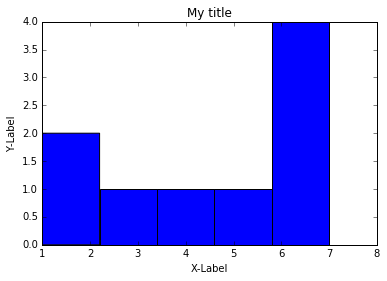

In [5]:
# Implement this -- Coding Part 1 of 2
def makeHistogram(values, numBins, xLabel, yLabel, title=None):
    """
      - values, a sequence of numbers
      - numBins, a positive int
      - xLabel, yLabel, title, are strings
      - Produces a histogram of values with numBins bins and the indicated labels
        for the x and y axis
      - If title is provided by caller, puts that title on the figure and otherwise
        does not title the figure
    """
    pylab.hist(values, bins=numBins)
    if title:
        pylab.title(title)
    pylab.xlabel(xLabel)
    pylab.ylabel(yLabel)
    pylab.show()
    

makeHistogram([1,2,3,4,5,6,6,6,7], 5, "X-Label", "Y-Label", title="My title")

## Problem 6-2

(20 points possible)<br>
Write a function called getAverage(die, numRolls, numTrials), with the following specification:

```python
def getAverage(die, numRolls, numTrials):
    """
      - die, a Die
      - numRolls, numTrials, are positive ints
      - Calculates the expected mean value of the longest run of a number
        over numTrials runs of numRolls rolls.
      - Calls makeHistogram to produce a histogram of the longest runs for all
        the trials. There should be 10 bins in the histogram
      - Choose appropriate labels for the x and y axes.
      - Returns the mean calculated
    """
```

A run of numbers counts the number of times the same dice value shows up in consecutive rolls. For example:

a dice roll of 1 4 3 has a longest run of 1<br>
a dice roll of 1 3 3 2 has a longest run of 2<br>
a dice roll of 5 4 4 4 5 5 2 5 has a longest run of 3<br>
When this function is called with the test case given in the file, it will return 5.312. Your simulation may give slightly different values.

Paste your entire function (including the definition) in the box.

Restrictions:

Do not import or use functions or methods from pylab, numpy, or matplotlib.
Do not leave any debugging print statements when you paste your code in the box.
If you do not see the return value being printed when testing your function, close the histogram window.

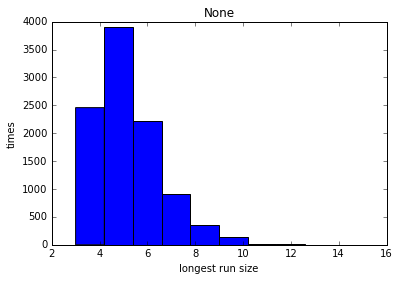

5.3283


In [8]:
def getLongestRun(values):
    if values: 
        current = values[0]
        size = 1
        max_size = 1
        for elem in values[1:]:
            if elem == current:
                size += 1
                max_size = max(max_size, size)
            else:
                current = elem
                size = 1
        return max_size
    return 0

def getAverage(die, numRolls, numTrials):
    """
      - die, a Die
      - numRolls, numTrials, are positive ints
      - Calculates the expected mean value of the longest run of a number
        over numTrials runs of numRolls rolls.
      - Calls makeHistogram to produce a histogram of the longest runs for all
        the trials. There should be 10 bins in the histogram
      - Choose appropriate labels for the x and y axes.
      - Returns the mean calculated
    """
    longest_run = []
    for trial in range(numTrials):
        values = [die.roll() for _ in range(numRolls)]
        longest_run.append(getLongestRun(values))
    mean, std = getMeanAndStd(longest_run)
    makeHistogram(longest_run, 10, 'longest run size', 'times')
    return mean

print getAverage(Die([1,2,3,4,5,6,6,6,7]), 500, 10000)